In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,layers
from tensorflow.keras.layers import Activation, MaxPooling2D, Flatten, Dense, Dropout
import pandas as pd
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt
import os
print("Modueles imported")

Modueles imported


In [2]:
print("This is enough to for the model. The excel is simply for human understanding")
train_images = idx2numpy.convert_from_file('train-images-idx3-ubyte')
train_labels = idx2numpy.convert_from_file('train-labels-idx1-ubyte')
test_images = idx2numpy.convert_from_file('t10k-images-idx3-ubyte')
test_labels = idx2numpy.convert_from_file('t10k-labels-idx1-ubyte')

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

This is enough to for the model. The excel is simply for human understanding


In [20]:
#These are 28 x 28 pixel images that have a greyscale value from 0 to 255 for each pixel. Black is 0, white is 255

#picked one image and its categorical output. Now will try to convolute and pool it.
img = train_images[0]
label = train_labels[0]

In [ ]:
if os.path.exists('fashion_cnn.keras'):
    model = keras.models.load_model('fashion_cnn.keras')
    print("Model imported")
else:
    model = keras.Sequential()
    model.add(layers.Conv2D(12,(2,2),padding='same', input_shape=(28,28,1)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(layers.Conv2D(24,(2,2),padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(layers.Conv2D(30,(2,2),padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(layers.Conv2D(30,(2,2),padding='same'))
    model.add(Activation('relu'))

    model.add(layers.Conv2D(36,(2,2),padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(20,activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(15,activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(15,activation='relu'))
    model.add(layers.Dense(10,activation='softmax'))

    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    print("local model not found, new model created")

local model not found, new model created


In [14]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 12)     │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 28, 28, 12)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 12)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 24)     │         1,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 14, 14, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 24)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 7, 7, 30)       │         2,910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 7, 7, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 3, 3, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 3, 3, 30)       │         3,630 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 3, 3, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 3, 3, 36)       │         4,356 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 3, 3, 36)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 1, 1, 36)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 20)             │           740 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 15)             │           315 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 15)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,587 (53.07 KB)

 Trainable params: 13,587 (53.07 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(train_images, train_labels,
                    epochs=24, 
                    batch_size=64,
                    validation_data=(test_images, test_labels))

Epoch 1/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.3954 - loss: 1.5582 - val_accuracy: 0.7314 - val_loss: 0.6471
Epoch 2/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7095 - loss: 0.7364 - val_accuracy: 0.7997 - val_loss: 0.5184
Epoch 3/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7619 - loss: 0.6311 - val_accuracy: 0.8099 - val_loss: 0.4813
Epoch 4/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7881 - loss: 0.5733 - val_accuracy: 0.8315 - val_loss: 0.4852
Epoch 5/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8127 - loss: 0.5296 - val_accuracy: 0.8463 - val_loss: 0.4413
Epoch 6/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8255 - loss: 0.5004 - val_accuracy: 0.8623 - val_loss: 0.4137
Epoch 7/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8378 - loss: 0.4745 - val_accuracy: 0.8643 - val_loss: 0.3994
Epoch 8/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8431 - loss: 0.4509 - val_accuracy: 

In [16]:
model.save('fashion_cnn.keras')

In [17]:
model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8901 - loss: 0.3341


[0.3265918791294098, 0.8906000256538391]

Two Fashion MNIST images have been plotted and saved as 'fashion_mnist_images.png'.


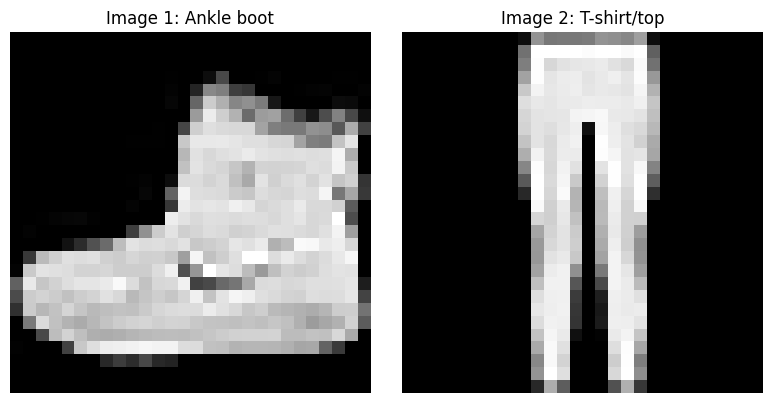

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import struct

def read_idx_images(filename):
    """Parses an IDX image file and returns a NumPy array."""
    with open(filename, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack(">IIII", f.read(16))
        if magic != 2051:
            raise ValueError(f"Invalid magic number in {filename}")
        data = np.fromfile(f, dtype=np.uint8).reshape(num_images, rows, cols)
    return data

def read_idx_labels(filename):
    """Parses an IDX label file and returns a NumPy array."""
    with open(filename, 'rb') as f:
        magic, num_labels = struct.unpack(">II", f.read(8))
        if magic != 2049:
            raise ValueError(f"Invalid magic number in {filename}")
        data = np.fromfile(f, dtype=np.uint8)
    return data

try:
    train_images = read_idx_images('train-images-idx3-ubyte')
    train_labels = read_idx_labels('train-labels-idx1-ubyte')

    train_images = train_images.reshape((60000, 28, 28, 1))
    train_images = train_images.astype('float32') / 255

    # Create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))

    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    # Display the first image
    ax[0].imshow(train_images[0, :, :, 0], cmap='gray')
    ax[0].set_title(f'Image 1: {class_names[train_labels[0]]}')
    ax[0].axis('off')

    # Display the second image
    ax[1].imshow(train_images[38, :, :, 0], cmap='gray')
    ax[1].set_title(f'Image 2: {class_names[train_labels[1]]}')
    ax[1].axis('off')

    # Adjust layout and save the plot
    plt.tight_layout()
    plt.savefig('fashion_mnist_images.png')
    
    print("Two Fashion MNIST images have been plotted and saved as 'fashion_mnist_images.png'.")
except FileNotFoundError as e:
    print(f"Error: The file '{e.filename}' was not found. Please ensure the dataset files are in the working directory.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")